# Plotting trend lines on HDFCBANK CSV Dataset

## Installing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [5]:
url = 'https://trello.com/1/cards/6438c561324b51d6acb221e1/attachments/645109ea1d9383a766147bd9/download/StockDataHDFCBANK.csv'
df = pd.read_csv(url)

### Data Pre-processing

In [7]:
# Convert the 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the first few rows of the dataframe
print(df.head())

                           Unnamed: 0     Open     High      Low    Close  \
Date                                                                        
2023-04-03 09:15:00+05:30           0  1607.55  1609.55  1606.00  1606.65   
2023-04-03 09:20:00+05:30           1  1606.55  1607.95  1603.40  1607.25   
2023-04-03 09:25:00+05:30           2  1607.45  1607.65  1604.10  1607.00   
2023-04-03 09:30:00+05:30           3  1607.00  1610.15  1606.70  1609.10   
2023-04-03 09:35:00+05:30           4  1609.40  1610.40  1607.65  1608.25   

                           Volume  
Date                               
2023-04-03 09:15:00+05:30  169821  
2023-04-03 09:20:00+05:30  203608  
2023-04-03 09:25:00+05:30  164006  
2023-04-03 09:30:00+05:30  226137  
2023-04-03 09:35:00+05:30  138182  


### Data Visualisation

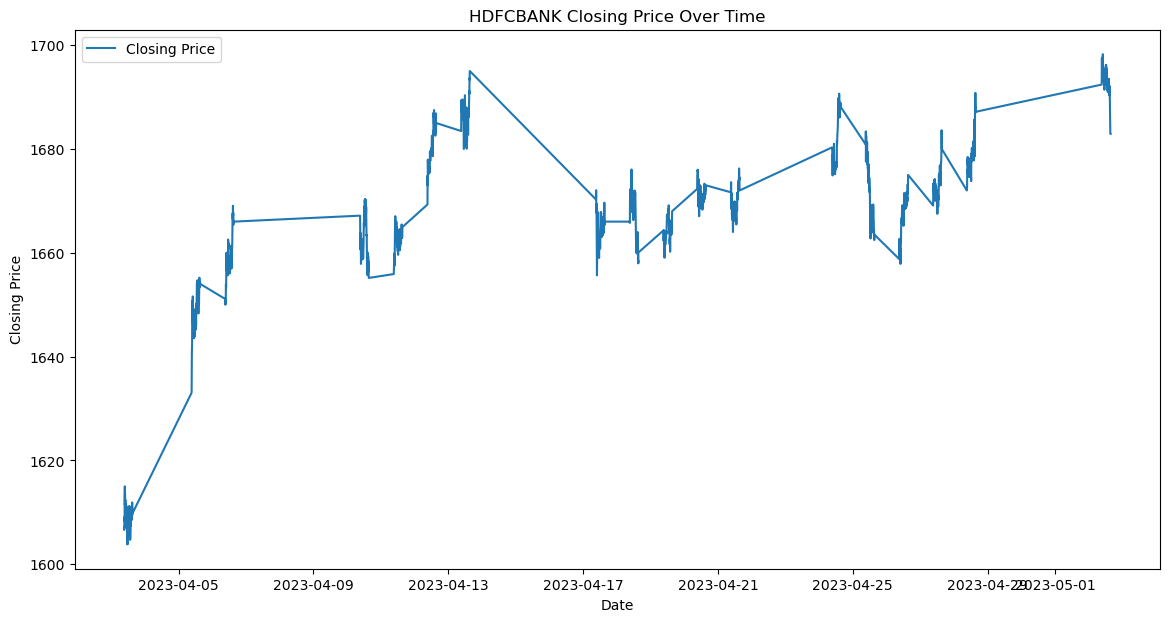

In [9]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('HDFCBANK Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

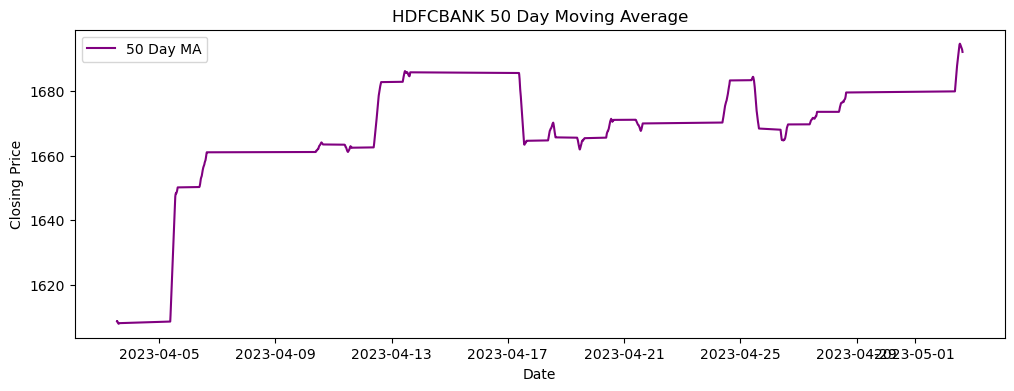

In [10]:
# calculate the 50-day and 200-day moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# plot 50 day moving average
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['MA_50'],label='50 Day MA', color='purple')
plt.title('HDFCBANK 50 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

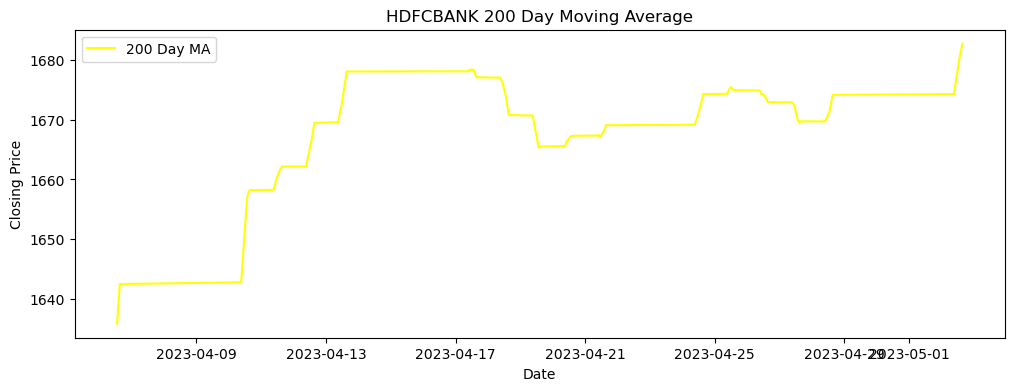

In [11]:
# plot 200 day moving average
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['MA_200'],label='200 Day MA', color='yellow')
plt.title('HDFCBANK 200 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

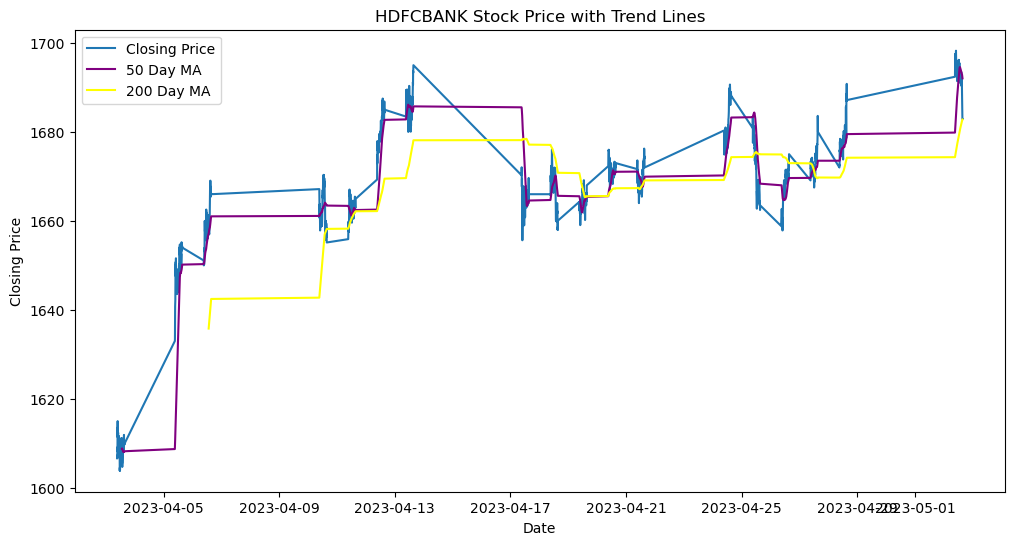

In [12]:
# plot closing prices with 50 day and 200 day moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.plot(df.index, df['MA_50'],label='50 Day MA', color='purple')
plt.plot(df.index, df['MA_200'],label='200 Day MA', color='yellow')
plt.title('HDFCBANK Stock Price with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Plot closing prices with 50-day and 200-day moving average with shading

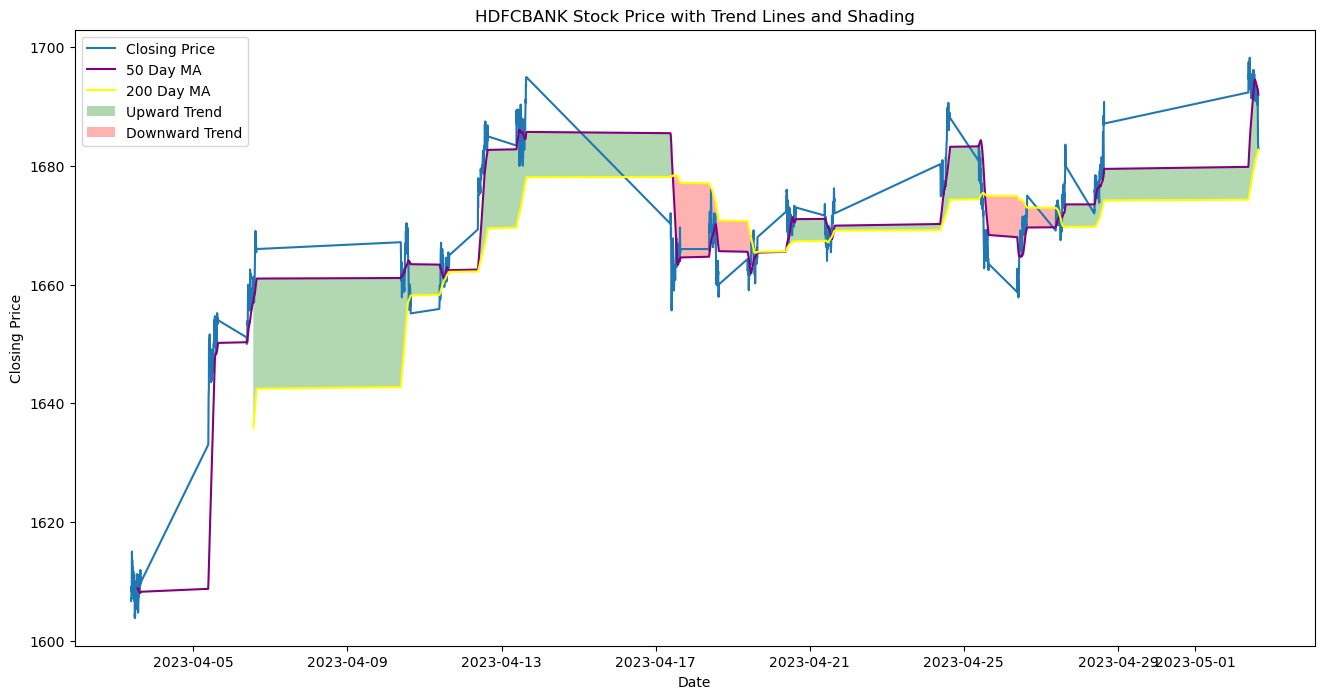

In [28]:
# Plot closing prices with 50-day and 200-day moving average with shading
plt.figure(figsize=(16, 8))  # Increase the size of the figure
plt.plot(df.index, df['Close'], label='Closing Price')
plt.plot(df.index, df['MA_50'], label='50 Day MA', color='purple')
plt.plot(df.index, df['MA_200'], label='200 Day MA', color='yellow')

# Shading the upward trend (when MA_50 > MA_200)
plt.fill_between(df.index, df['MA_50'], df['MA_200'], 
                 where=(df['MA_50'] > df['MA_200']), 
                 facecolor='green', alpha=0.3, label='Upward Trend')

# Shading the downward trend (when MA_50 < MA_200)
plt.fill_between(df.index, df['MA_50'], df['MA_200'], 
                 where=(df['MA_50'] < df['MA_200']), 
                 facecolor='red', alpha=0.3, label='Downward Trend')

plt.title('HDFCBANK Stock Price with Trend Lines and Shading')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()